<h1><center>Regression Project on Marketing Mix Models</center></h1>

In [48]:
# Importing Neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [49]:
# Loading Dataset

df =pd.read_csv("marketing_spend_and_revenue_data.csv")
df1=df.copy()

## Exploratory data analysis (EDA)

In [50]:
# Dataframe

df1.head()

,Revenue,Google Perform,Google Search,Google Search.1,Facebook Conv,Facebook Other,Facebook Produ,Influencers,Display Ads,TV Ads,Radio Ads,Magazine Ads
0,5796.714153,565.844985,322.220135,1362.108867,163.379921,152.275251,585.579521,486.459433,1326.028990,1702.230023,166.876823,599.465584
1,5165.863043,458.498491,232.034662,1217.779342,240.671009,572.280788,367.558630,181.465092,761.528524,1082.458280,127.253406,319.817106
2,6965.648769,673.987247,351.658849,1723.328306,777.660821,646.790367,443.272047,413.778807,421.681361,630.103186,192.637981,282.768261
3,5710.922590,600.195659,253.768143,688.169972,580.639485,545.659219,375.149632,190.269984,244.705077,2318.640804,166.475016,412.040813
4,4371.813951,456.867519,255.514027,835.129990,332.607431,449.809561,363.454579,294.213237,552.753741,2157.475018,127.684970,184.554535


In [51]:
# Descriptive_Statistics of the Dataframe

Descriptive_Stats = df1.describe()
Descriptive_Stats

,Revenue,Google Perform,Google Search,Google Search.1,Facebook Conv,Facebook Other,Facebook Produ,Influencers,Display Ads,TV Ads,Radio Ads,Magazine Ads
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,7900.774957,789.936482,392.411062,1078.169406,478.057189,550.112605,629.836776,275.546613,846.135791,1448.513381,238.025345,397.785930
std,1430.141416,172.276270,85.953756,436.142312,183.960184,261.569706,143.046853,132.043304,383.768572,574.515785,52.202092,172.150649
min,4095.786143,240.651050,158.528897,307.844420,150.019967,105.182794,264.070436,50.102167,206.021630,502.947644,84.875264,103.628226
25%,6974.247316,671.008486,336.183785,737.041609,318.786045,341.917853,531.905607,164.601780,508.806322,955.499472,207.927612,252.634949
50%,7915.844902,796.462406,396.050638,1067.670685,491.356199,545.659219,637.274431,273.633567,861.562291,1428.190319,237.792313,394.956728
75%,8870.198709,913.110964,449.222336,1462.851808,640.452868,756.557406,714.792181,390.777340,1187.217741,1929.437667,275.749502,547.440270
max,11667.224110,1319.046273,655.498198,1799.576510,797.852955,997.514110,1075.921842,499.736177,1498.560396,2496.695023,377.284762,699.734622


In [52]:
# Checking Missing values

missing_values = df1.isnull().sum()
missing_values

Revenue            0
Google Perform     0
Google Search      0
Google Search.1    0
Facebook Conv      0
Facebook Other     0
Facebook Produ     0
Influencers        0
Display Ads        0
TV Ads             0
Radio Ads          0
Magazine Ads       0
dtype: int64

In [53]:
# Droping the Label and Storing the Remaing Features in a Variable

coulumn_names = df1.drop('Revenue',axis = 1).columns  

In [54]:
# Counting the No of Features and Storing it as a List 

x=0
y=[]

for i in coulumn_names:
    x=x+1
    y.append(x)

y

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [55]:
# Storing index Feture names in a list

z=[]
for i in coulumn_names:
    z.append(i)
z

['Google Perform',
 'Google Search',
 'Google Search.1',
 'Facebook Conv',
 'Facebook Other',
 'Facebook Produ',
 'Influencers',
 'Display Ads',
 'TV Ads',
 'Radio Ads',
 'Magazine Ads']

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

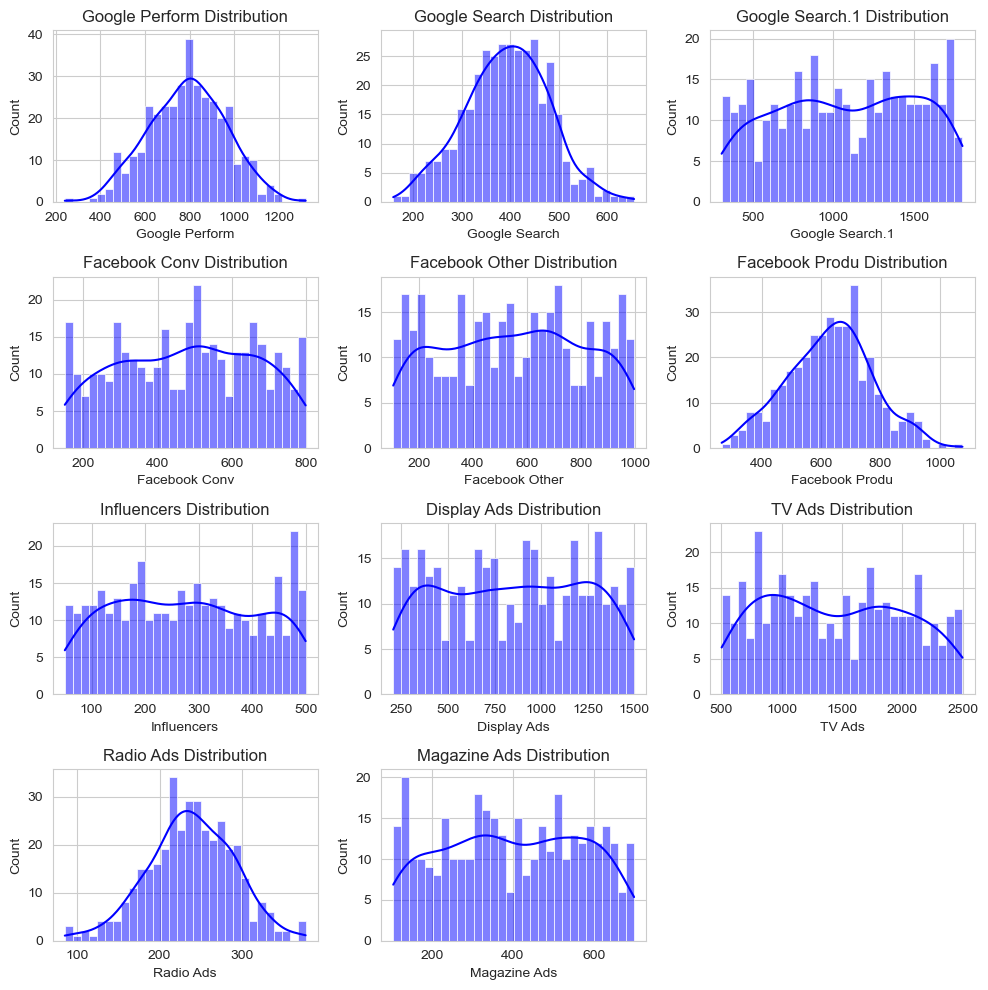

In [56]:
# Plotting the Distribution Graphs of All the Features

sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

for column_num in y:
    
    for column_name in z:
        plt.subplot(4, 3, column_num)
        sns.histplot(df1[column_name], kde=True, color='blue', bins=30)
        plt.title( column_name + ' ' + 'Distribution' )
        break
    del z[0]  

plt.tight_layout()
plt.show()



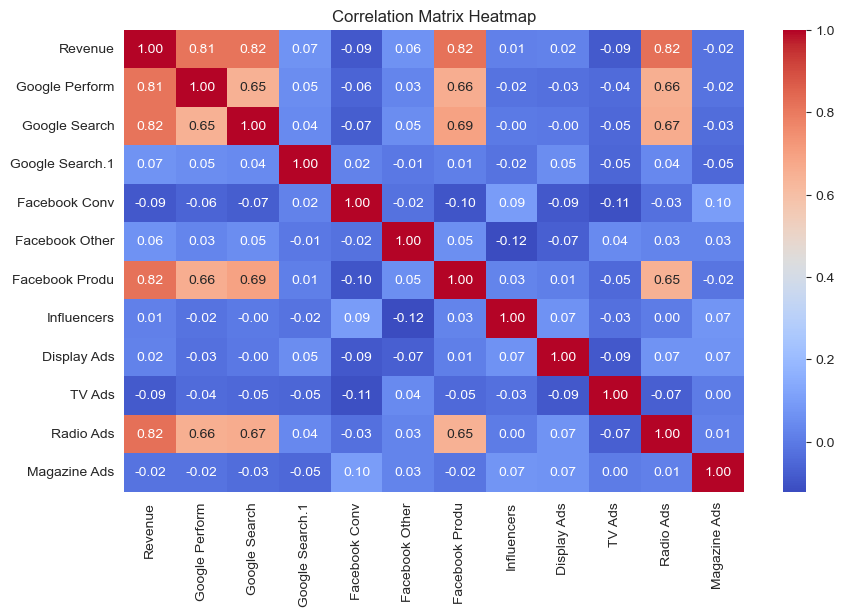

In [57]:
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.show()

In [58]:
# List Z was empties while doing Distribution plots so we are storing z again for Scatter plots

z=[]
for i in coulumn_no:
    z.append(i)
z

['Google Perform',
 'Google Search',
 'Google Search.1',
 'Facebook Conv',
 'Facebook Other',
 'Facebook Produ',
 'Influencers',
 'Display Ads',
 'TV Ads',
 'Radio Ads',
 'Magazine Ads']

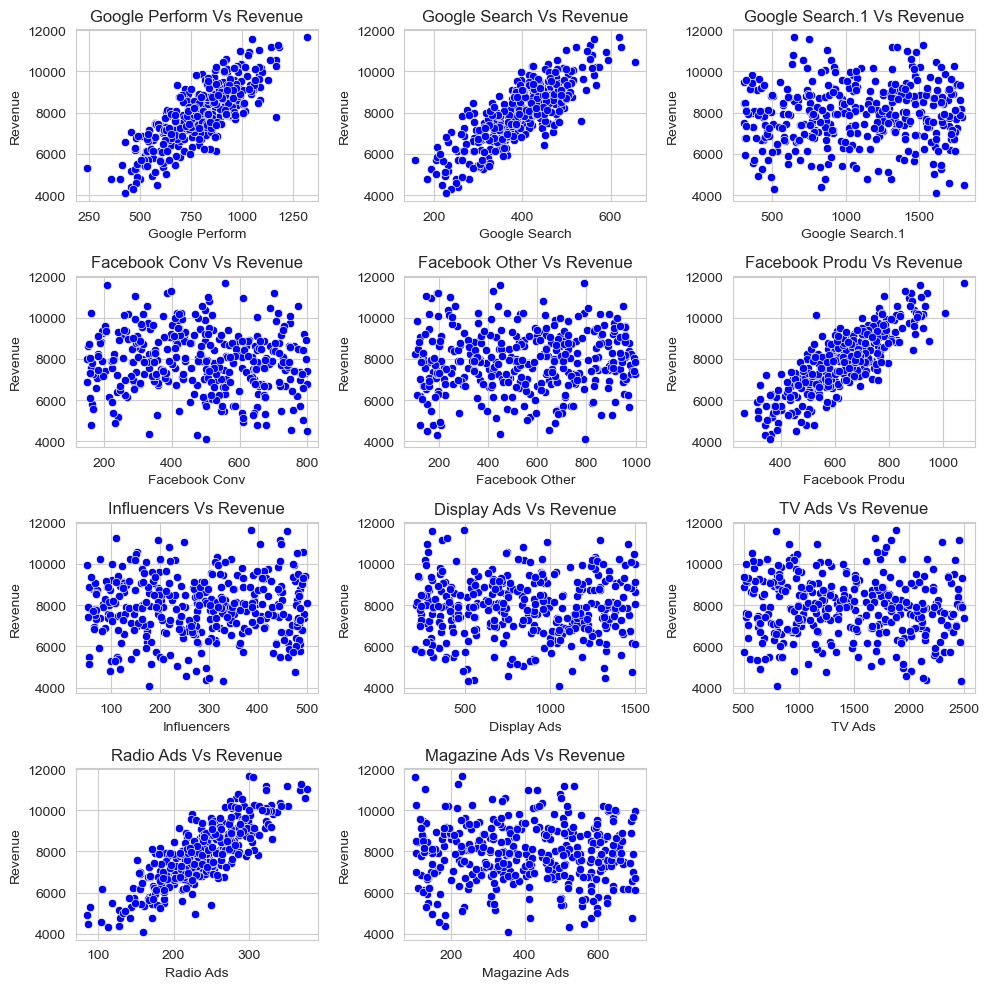

In [59]:
# Feature Vs Label Scatter Plots

plt.figure(figsize=(10, 10))

for column_num in y:
    
    for column_name in z:
        plt.subplot(4, 3, column_num)
        sns.scatterplot(x=column_name, y='Revenue', data=df1, color='blue')
        plt.title( column_name +' '+ 'Vs Revenue' )
        break
    del z[0]  

plt.tight_layout()
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

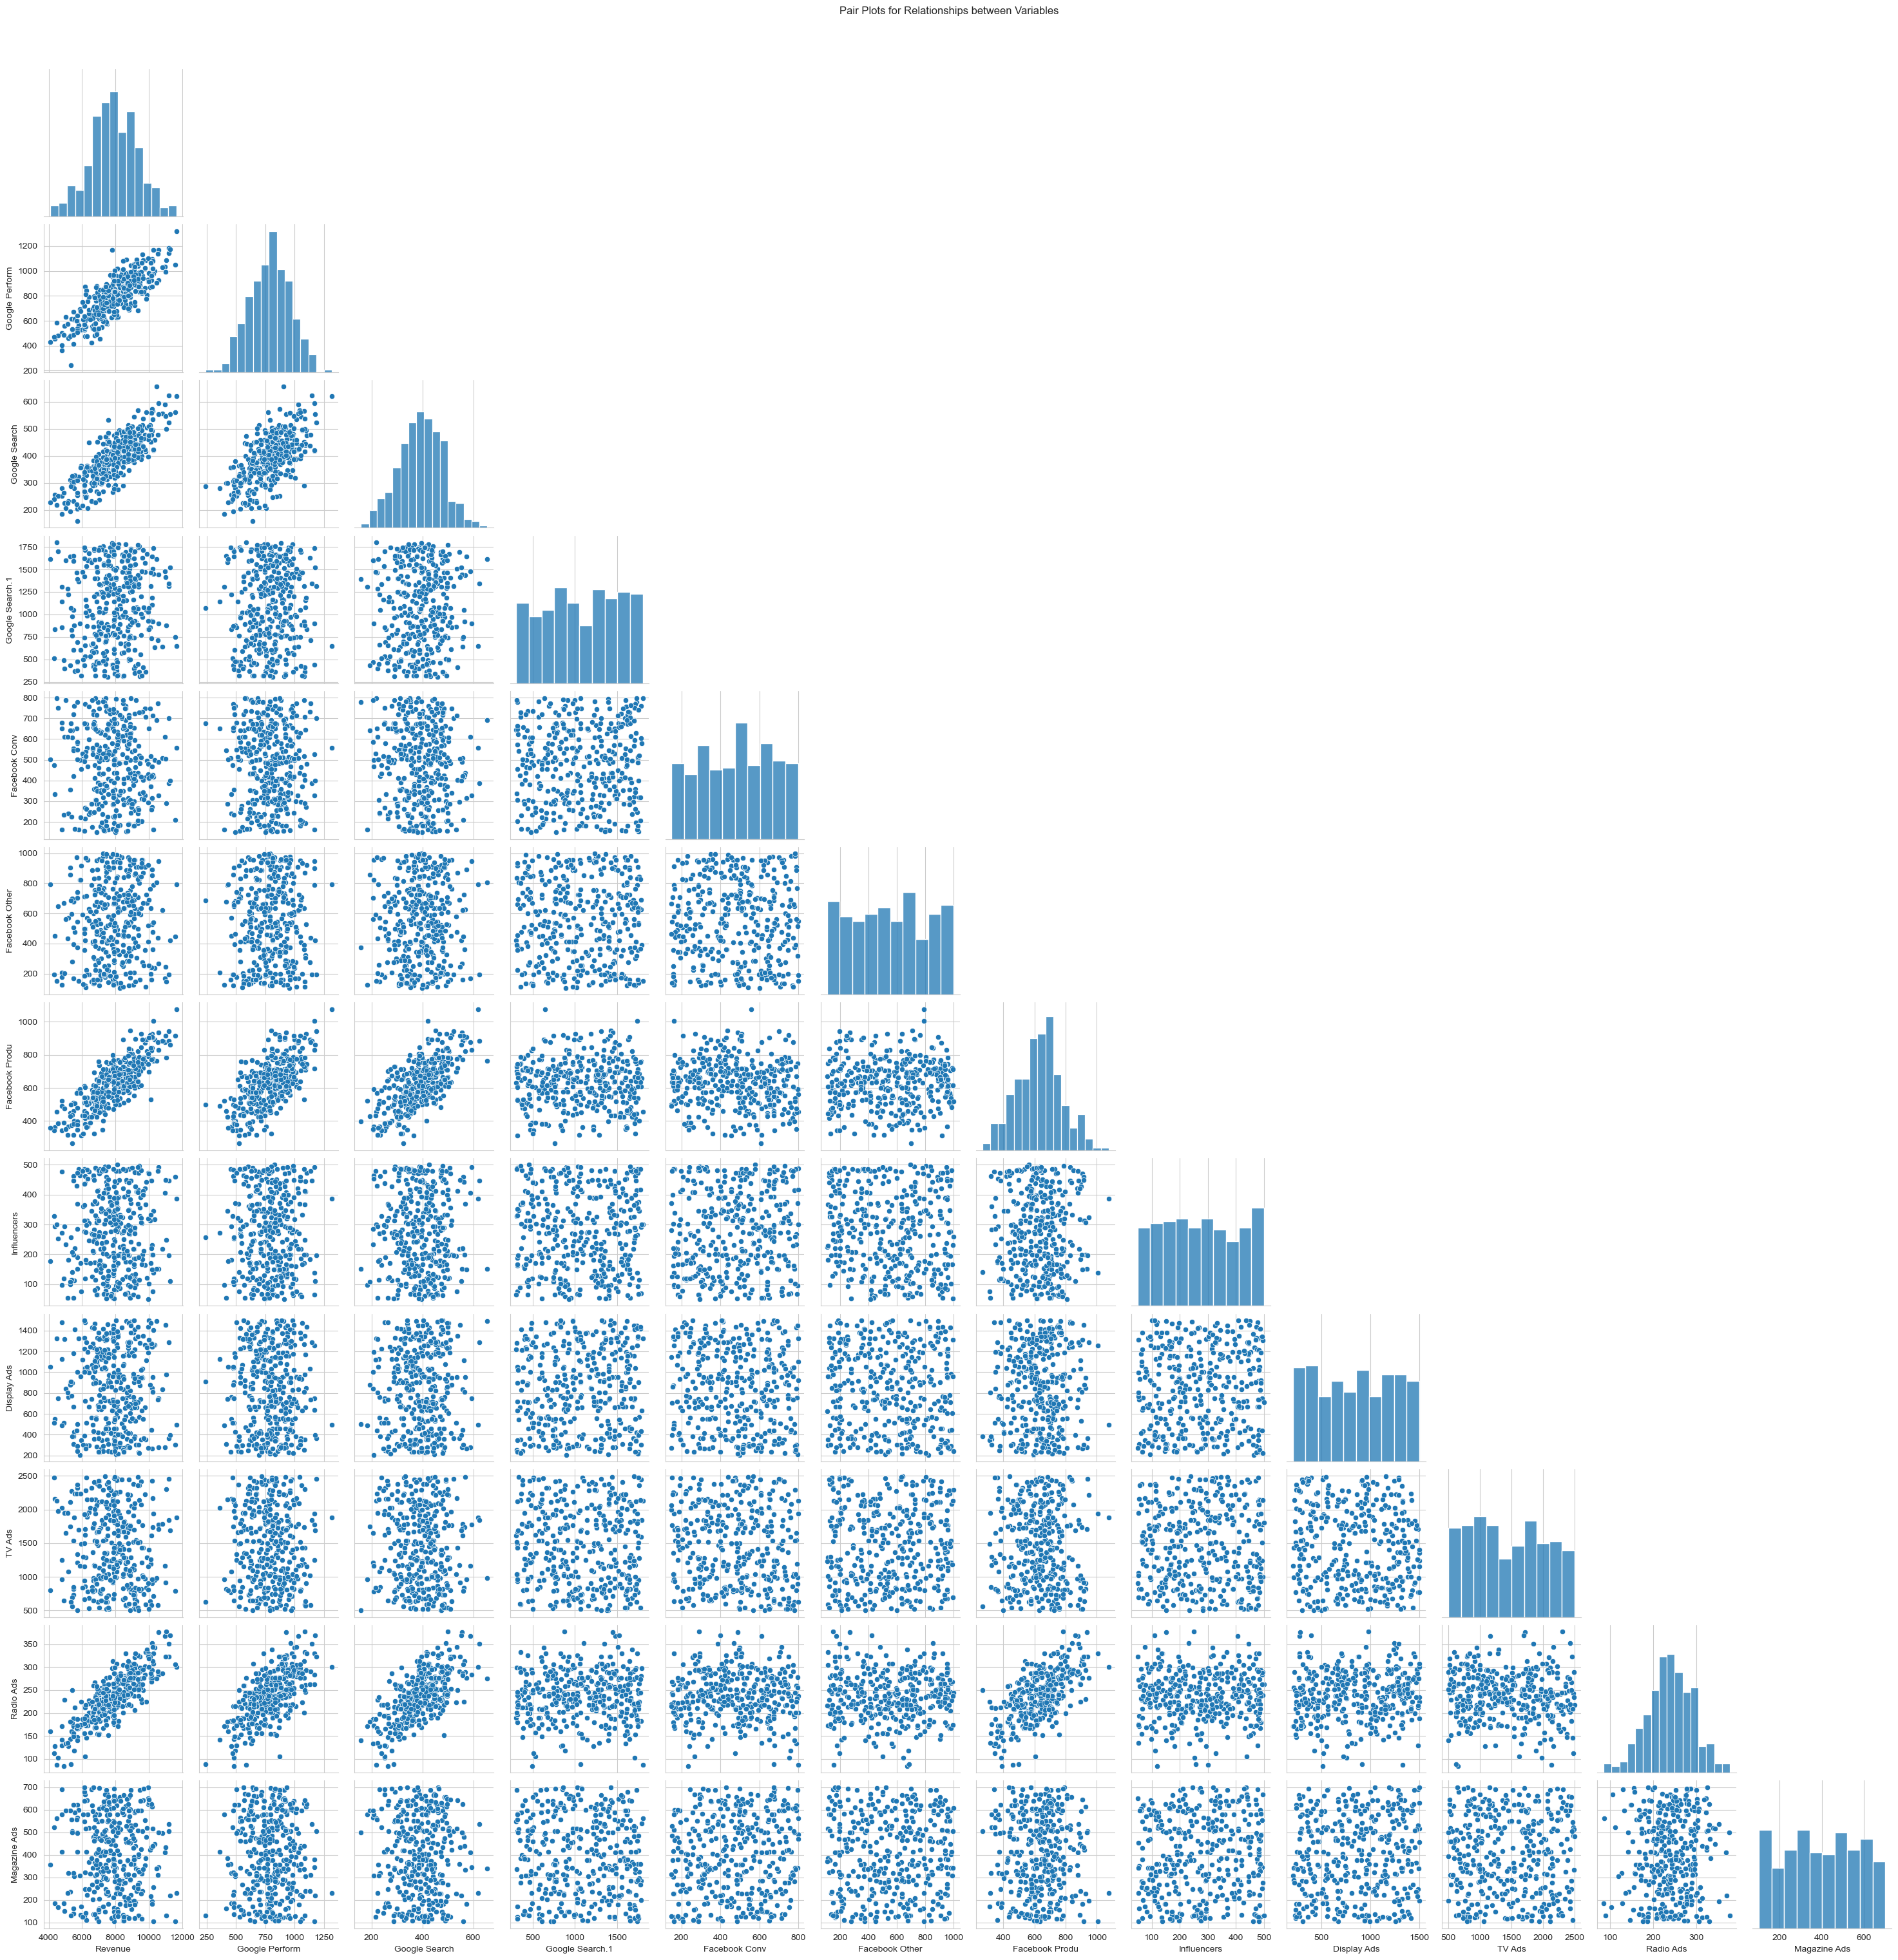

In [60]:
# Create pair plots for the entire dataset to visualize the relationships between all variables

sns.pairplot(df1, corner=True)
plt.suptitle('Pair Plots for Relationships between Variables', y=1.02)  # y=1.02 to adjust space
plt.show()

In [61]:
# Restoring z variable

z=[]
for i in coulumn_no:
    z.append(i)
z

['Google Perform',
 'Google Search',
 'Google Search.1',
 'Facebook Conv',
 'Facebook Other',
 'Facebook Produ',
 'Influencers',
 'Display Ads',
 'TV Ads',
 'Radio Ads',
 'Magazine Ads']

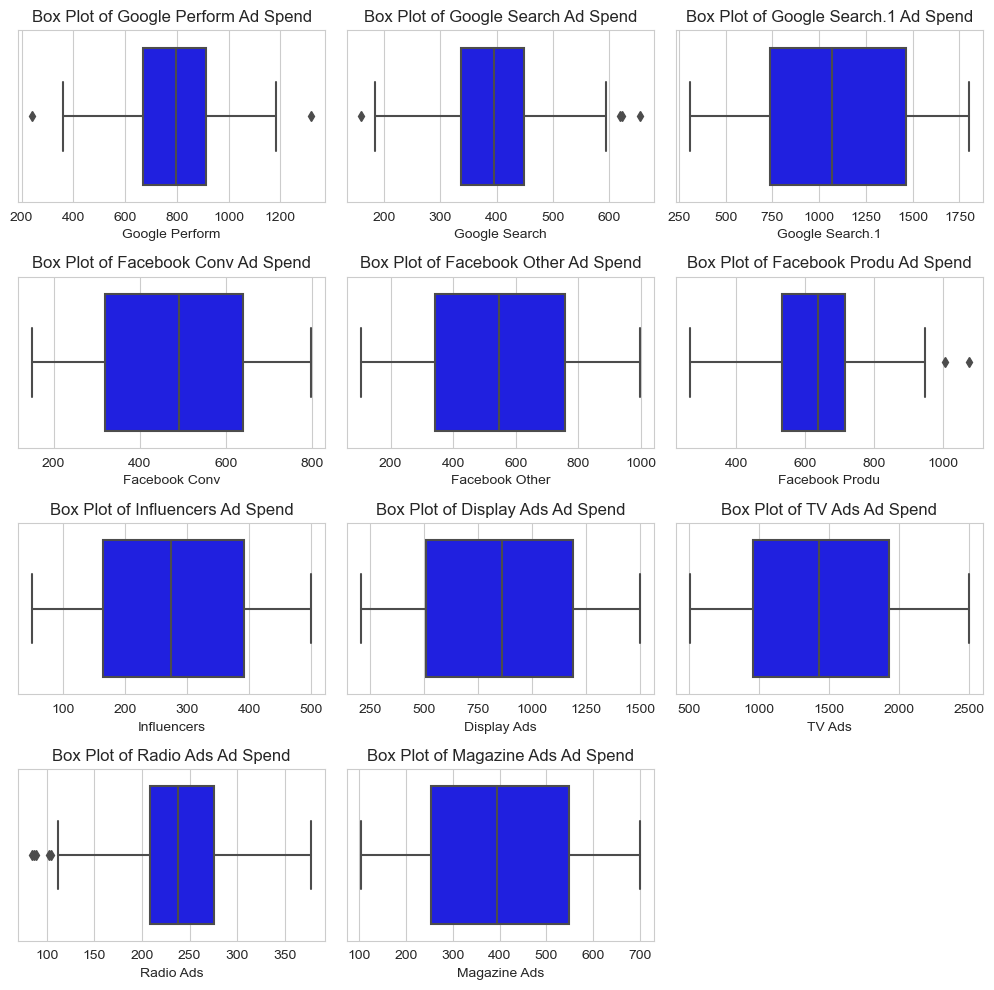

In [62]:
# Checking for Outliers

plt.figure(figsize=(10, 10))

for column_num in y:
    
    for column_name in z:
        plt.subplot(4, 3, column_num)
        sns.boxplot(x=df1[column_name], color='blue')
        plt.title( 'Box Plot of '+ column_name +' ' +'Ad Spend')
        break
    del z[0]  

plt.tight_layout()
plt.show()

In [63]:
# Correlation of Label for all Feature

correlation_matrix = df1.corr()
correlation_matrix['Revenue']

Revenue            1.000000
Google Perform     0.813555
Google Search      0.815666
Google Search.1    0.070942
Facebook Conv     -0.086756
Facebook Other     0.064756
Facebook Produ     0.819146
Influencers        0.014260
Display Ads        0.019627
TV Ads            -0.086229
Radio Ads          0.821419
Magazine Ads      -0.018291
Name: Revenue, dtype: float64

In [64]:
# Prepare feature variables and target variable

X = df1.drop('Revenue', axis=1)  # feature variables
y = df1['Revenue']  # target variable

In [65]:
# Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [66]:
# Scaling the Features

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [67]:
# Tranforming the X_Train and X_Test

X_train = scaler.transform(X_train)

X_test  = scaler.transform(X_test)

## Model Building and Prediction

In [69]:
# Create a linear regression model instance
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predictions for the test set
y_pred = model.predict(X_test)

In [71]:
# Calculate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(233627.353860785, 0.8922622386718018)

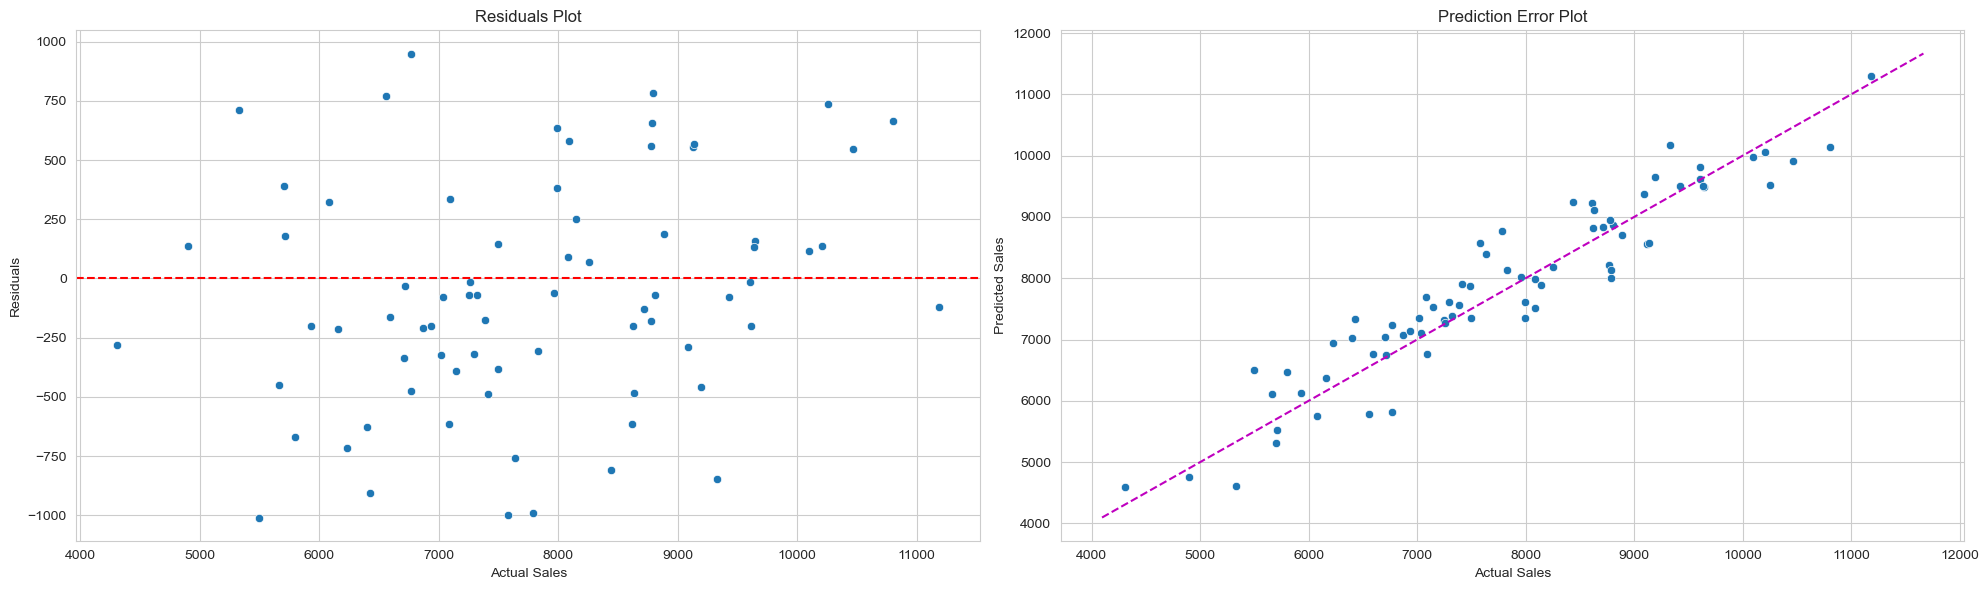

In [72]:
# Calculating residuals
residuals = y_test - y_pred

# Setting up the visualization layout
plt.figure(figsize=(20, 6))

# Residuals Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.title('Residuals Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')

# Prediction Error Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--')  # Add a diagonal line
plt.title('Prediction Error Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

## Saving Model for Production

In [73]:
# Save the model to a file (adjust the path as needed)

model_file_path = 'Regression_on_Marketing_Mix_Models.pkl'
joblib.dump(model, model_file_path)


['Regression_on_Marketing_Mix_Models.pkl']